In [1]:
!pip install -r requirements.txt

Looking in indexes: https://nexus.cnj.jus.br/repository/pypi-all/simple
You are using pip version 18.1, however version 21.2.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
mpl.rcParams['figure.figsize']=(10,6)
mpl.rcParams['font.size'] = 22

In [4]:
passageiros = pd.read_csv('Passageiros.csv')

In [5]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


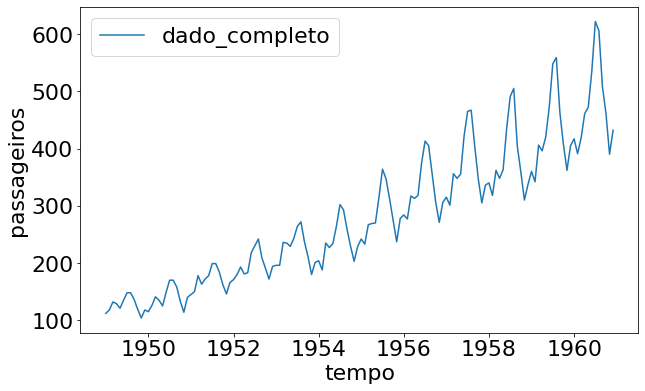

In [12]:
def plotar_dados(dados):
    sns.lineplot(x='tempo', y='passageiros', data=dados, label='dado_completo')
    
plotar_dados(passageiros)

In [10]:
sc = StandardScaler()
sc.fit(passageiros)
dado_escalado = sc.transform(passageiros)
dado_escalado

array([[-1.72006415, -1.40777884],
       [-1.69600731, -1.35759023],
       [-1.67195047, -1.24048348],
       [-1.64789363, -1.26557778],
       [-1.62383679, -1.33249593],
       [-1.59977995, -1.21538918],
       [-1.5757231 , -1.10664719],
       [-1.55166626, -1.10664719],
       [-1.52760942, -1.20702441],
       [-1.50355258, -1.34922546],
       [-1.47949574, -1.47469699],
       [-1.4554389 , -1.35759023],
       [-1.43138206, -1.38268454],
       [-1.40732522, -1.29067209],
       [-1.38326837, -1.16520057],
       [-1.35921153, -1.21538918],
       [-1.33515469, -1.29903686],
       [-1.31109785, -1.09828242],
       [-1.28704101, -0.9226223 ],
       [-1.26298417, -0.9226223 ],
       [-1.23892733, -1.02299951],
       [-1.21487049, -1.23211871],
       [-1.19081364, -1.3910493 ],
       [-1.1667568 , -1.17356534],
       [-1.14269996, -1.1317415 ],
       [-1.11864312, -1.08991766],
       [-1.09458628, -0.85570415],
       [-1.07052944, -0.98117567],
       [-1.0464726 ,

In [15]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

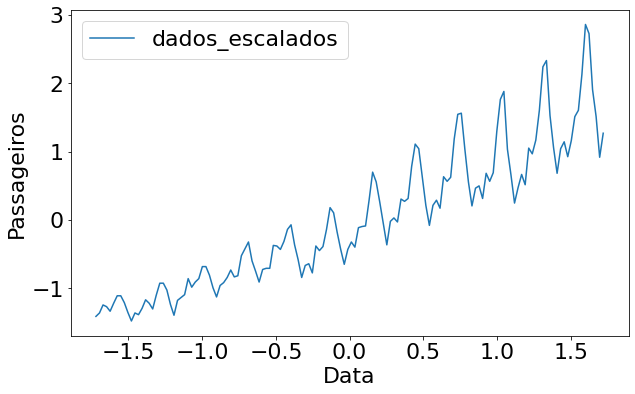

In [25]:
def plotar_eixos(x, y, label):
    sns.lineplot(x=x, y=y, label=label)
    plt.ylabel('Passageiros')
    plt.xlabel('Data')


plotar_eixos(x, y, 'dados_escalados')

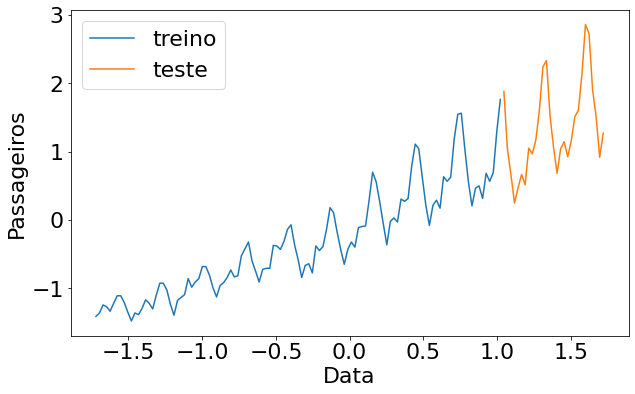

In [26]:
tamanho_treino = int(len(passageiros)*0.8)
tamanho_teste = int(len(passageiros)*0.2)

x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]
x_teste  = x[tamanho_treino:len(passageiros)]
y_teste = y[tamanho_treino:len(passageiros)]

plotar_eixos(x_treino, y_treino, 'treino')
plotar_eixos(x_teste, y_teste, 'teste')